In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Coletar dados dos FIIs site Funds Explorer

page = requests.get('https://www.fundsexplorer.com.br/ranking')
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find("table", attrs={"id":"table-ranking"})

# titulo das variaveis
title_data = table.thead.find_all("th")

# dados dos fundos
table_data = table.tbody.find_all("td")

# separando apenas dados, retira as tags
number_rows = int(len(table_data)/len(title_data))

elements_data = [[0]*len(title_data) for i in range(number_rows)]

i = 0
 
for x in range(number_rows):
    for y in range(len(title_data)):
        elements_data[x][y] = table_data[i].getText()
        i +=1

#criando dataframe

title = ['codigo', 'setor', 'preco_atual', 'liquidez_diaria', 'dividendo',
           'dividendyield', 'DY(3M)_acumulado', 'DY(6M)_acumulado', 
           'DY(12M)_acumulado', 'DY(3M)_media', 'DY(6M)_media', 
           'DY(12M)_media', 'DY_ano', 'variacao_preco', 'rent_periodo', 
           'rent_acumulada', 'patri_liq', 'VPA', 'P/VPA', 'DY_patri', 
           'var_patri', 'rent_patri_periodo', 'rent_patri_acumu',
           'vacancia_fisica', 'vancancia_financeira', 'quantidade_ativos']

data = elements_data
df = pd.DataFrame(data)
df.columns = title

for names in title:
    for i in range(len(df['codigo'])):
        if (type(df[names][i]) == str):
            df[names][i] =df[names][i].replace('.','').replace('R$ ','').replace('%','').replace(',','.')

#salvando dataframe
df.to_csv('dados_FIIs_FundsExplorer.csv', index=False, encoding='utf-32')

In [2]:
df[df["codigo"] == "KNRI11"]
#O valor da tabela sai no formato string então fiz uma variável auxiliar para converter o valor em float
xd = df[df["codigo"] == "KNRI11"].iloc[-1].values[4] #Aqui saí o valor do último provento
xp = df[df["codigo"] == "KNRI11"].iloc[-1].values[2] #Aqui saí o valor da última cotação
x3m = df[df["codigo"] == "KNRI11"].iloc[0].values[9] #DY Médio 3 meses
x6m = df[df["codigo"] == "KNRI11"].iloc[0].values[10] #Dy Médio 6 meses
x12m = df[df["codigo"] == "KNRI11"].iloc[0].values[11] #Dy médio 12 meses
#Com isso já dá pra calcular o DY, porém, antes é necessário converter os valores de String para Float
xa = float(xd)
xb = float(xp)
xc = float(x3m)
xd = float(x6m)
xe = float(x12m)
#E com isso definir uma variável auxiliar que me diz o número atual de cotas que eu tenho
Cotas = 1
print(f'Este é o valor do provento do último mês: {xa: .2f}R$')
print(f'Este é o valor do Dividend Yield do último mês: {(xa*100)/xb: .3f}%')
print(f'Atualmente eu tenho {Cotas:.2f} cotas, que na cotação atual estão avaliadas em {Cotas*xb: .2f} R$, essas cotas me geram {Cotas*xa: .2f} R$ por mês, então é esperado que eu receba {Cotas*xa*12: .2f} R$ este ano')
# 2.0.1 - Salário Mínimo em Proventos com base na cotação dada
SalarioMinimo = 1045
# X é o Valor gasto em (R$) para se obter 1 Salário Mínimo em Cotas com o Preço de HOJE
X = (SalarioMinimo*xb)/(xa)
#Y é o valor gasto em (R$) para se obter 1 salário mínimo de acordo com os proventos dos últimos 3 meses e com o preço do último fechamento
Y = (SalarioMinimo*xb)/(xc) 
#Z é o valor gasto em (R$) para se obter 1 salário mínimo de acordo com os proventos dos últimos 6 meses e com o preço do último fechamento
Z = (SalarioMinimo*xb)/(xd) 
#W é o valor gasto em (R$) para se obter 1 salário mínimo de acordo com os proventos dos últimos 12 meses e com o preço do último fechamento
W = (SalarioMinimo*xb)/(xe) 
print(f'São necessários um total de {X: .2f}R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o ultimo provento')
print(f'São necessários um total de {Y: .2f}R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 3 meses')
print(f'São necessários um total de {Z: .2f}R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 6 meses')
print(f'São necessários um total de {W: .2f}R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 12 meses')
print(f' Isso me geraria um total de {X/xb: .2f} cotas')
print(f' Isso me geraria um total de {Y/xb: .2f} cotas')
print(f' Isso me geraria um total de {Z/xb: .2f} cotas')
print(f' Isso me geraria um total de {W/xb: .2f} cotas')
# Quantas cotas é possível comprar com 1 milhão de reias?
milhao = 1000000
print(f' Você precisa ter {milhao/xb:.1f} cotas pra ter 1 milhão de reais nesse ativo')
print(f' {(milhao/xb):.1f} cotas vão te  gerar o total de {(milhao/xb) *(xa): .2f} reais mensais')

Este é o valor do provento do último mês:  0.69R$
Este é o valor do Dividend Yield do último mês:  0.453%
Atualmente eu tenho 1.00 cotas, que na cotação atual estão avaliadas em  152.44 R$, essas cotas me geram  0.69 R$ por mês, então é esperado que eu receba  8.28 R$ este ano
São necessários um total de  230869.28R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o ultimo provento
São necessários um total de  379285.24R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 3 meses
São necessários um total de  388536.10R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 6 meses
São necessários um total de  388536.10R$ investidos para se alcançar o salário mínimo de acordo com a última cotação e o provento médio de 12 meses
 Isso me geraria um total de  1514.49 cotas
 Isso me geraria um total de  2488.10 cotas
 Isso me geraria um total de  2548.78 cotas
 Isso me ge

In [3]:
#Analisando Ações com Python usando Yahoo Finance
#1.0.0 Estas são as bibliotecas necessárias para a análise dos dados que vamos usar.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()
#1.0.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
#Essa faz a varredura dos dados
import pandas_datareader.data as web
#Essa se conecta ao portal yfinance.
import yfinance as yf
#1.0.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
ibov = web.get_data_yahoo('^BVSP')
#2.0.1 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Preço')

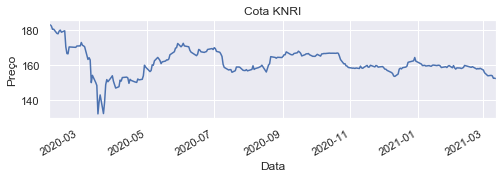

In [4]:
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end=today)
cotaknri11 = knri11["Close"].plot(figsize=(8,2))
plt.title("Cota KNRI")
plt.xlabel("Data")
plt.ylabel("Preço")